In [5]:
import sys
import os
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [6]:
sys.path.append(os.path.abspath('../src'))
from lib import (
    get_train_test_split,
    get_trained_model,
    train_and_evaluate_models,
    create_eui_comparison_plots,
)

In [7]:
output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'hdd_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

np.random.seed(123)
merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])

In [8]:
features = [
    "hdd_total_year", 
    "cdd_total_year", 
    "GDP_per_capita", 
    "Urbanization_Rate_2022",
    "latitude",
    "longitude",  
    "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index"
]

feature_abbreviations = {
    "hdd_total_year": "HDD",
    "cdd_total_year": "CDD", 
    "GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
    "latitude": "Lat",
    "longitude": "Long",
    "Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU" , 
    "Income index": "Income"
}

target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

regions = ['Asia & Oceania', 'Europe', 'Africa', 'Central and South America', 'Northern America']


Future work: Hyperparameter tuning

Experiment with KNN model performance using different hyperparameters:
- n_neighbors (3, 5, 7, 10)
- weights ('uniform', 'distance')
- distance metrics ('euclidean', 'manhattan')
- Document performance changes for each configuration

# KNN - Within Domain

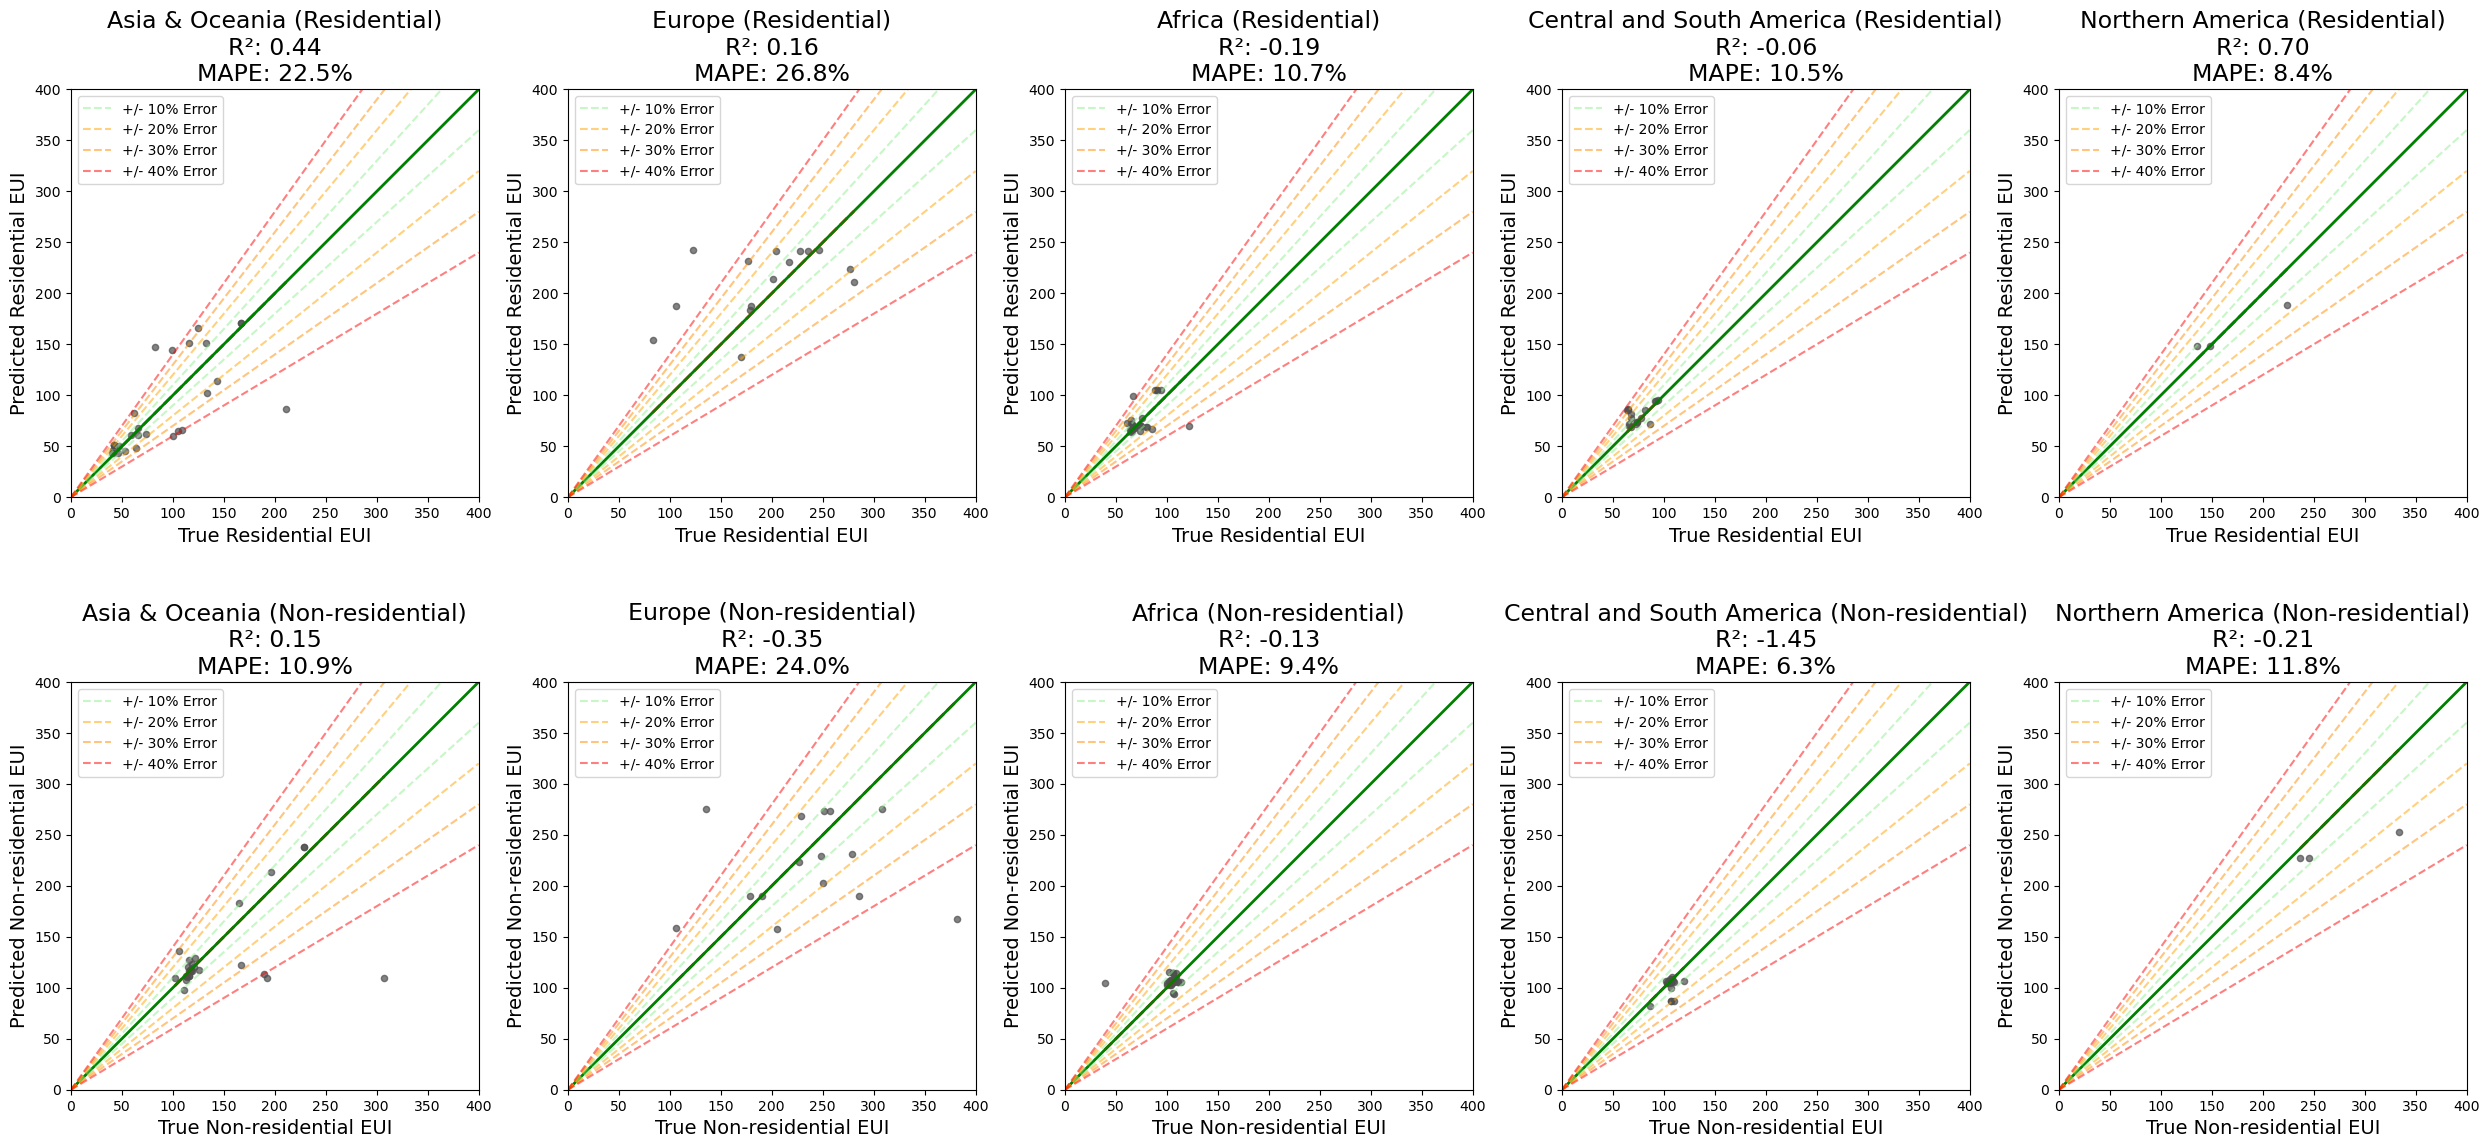

In [9]:
# Within-domain
model_knn_within = KNeighborsRegressor(n_neighbors=5)
results_within = train_and_evaluate_models(
   merged_df=merged_df,
   regions=regions, 
   features=features,
   model=model_knn_within,
   strategy='within_domain'
)
create_eui_comparison_plots(results_within, 
   save_path='../figures/eui_predictions_knn_within_domain.png')

# KNN - Cross Domain

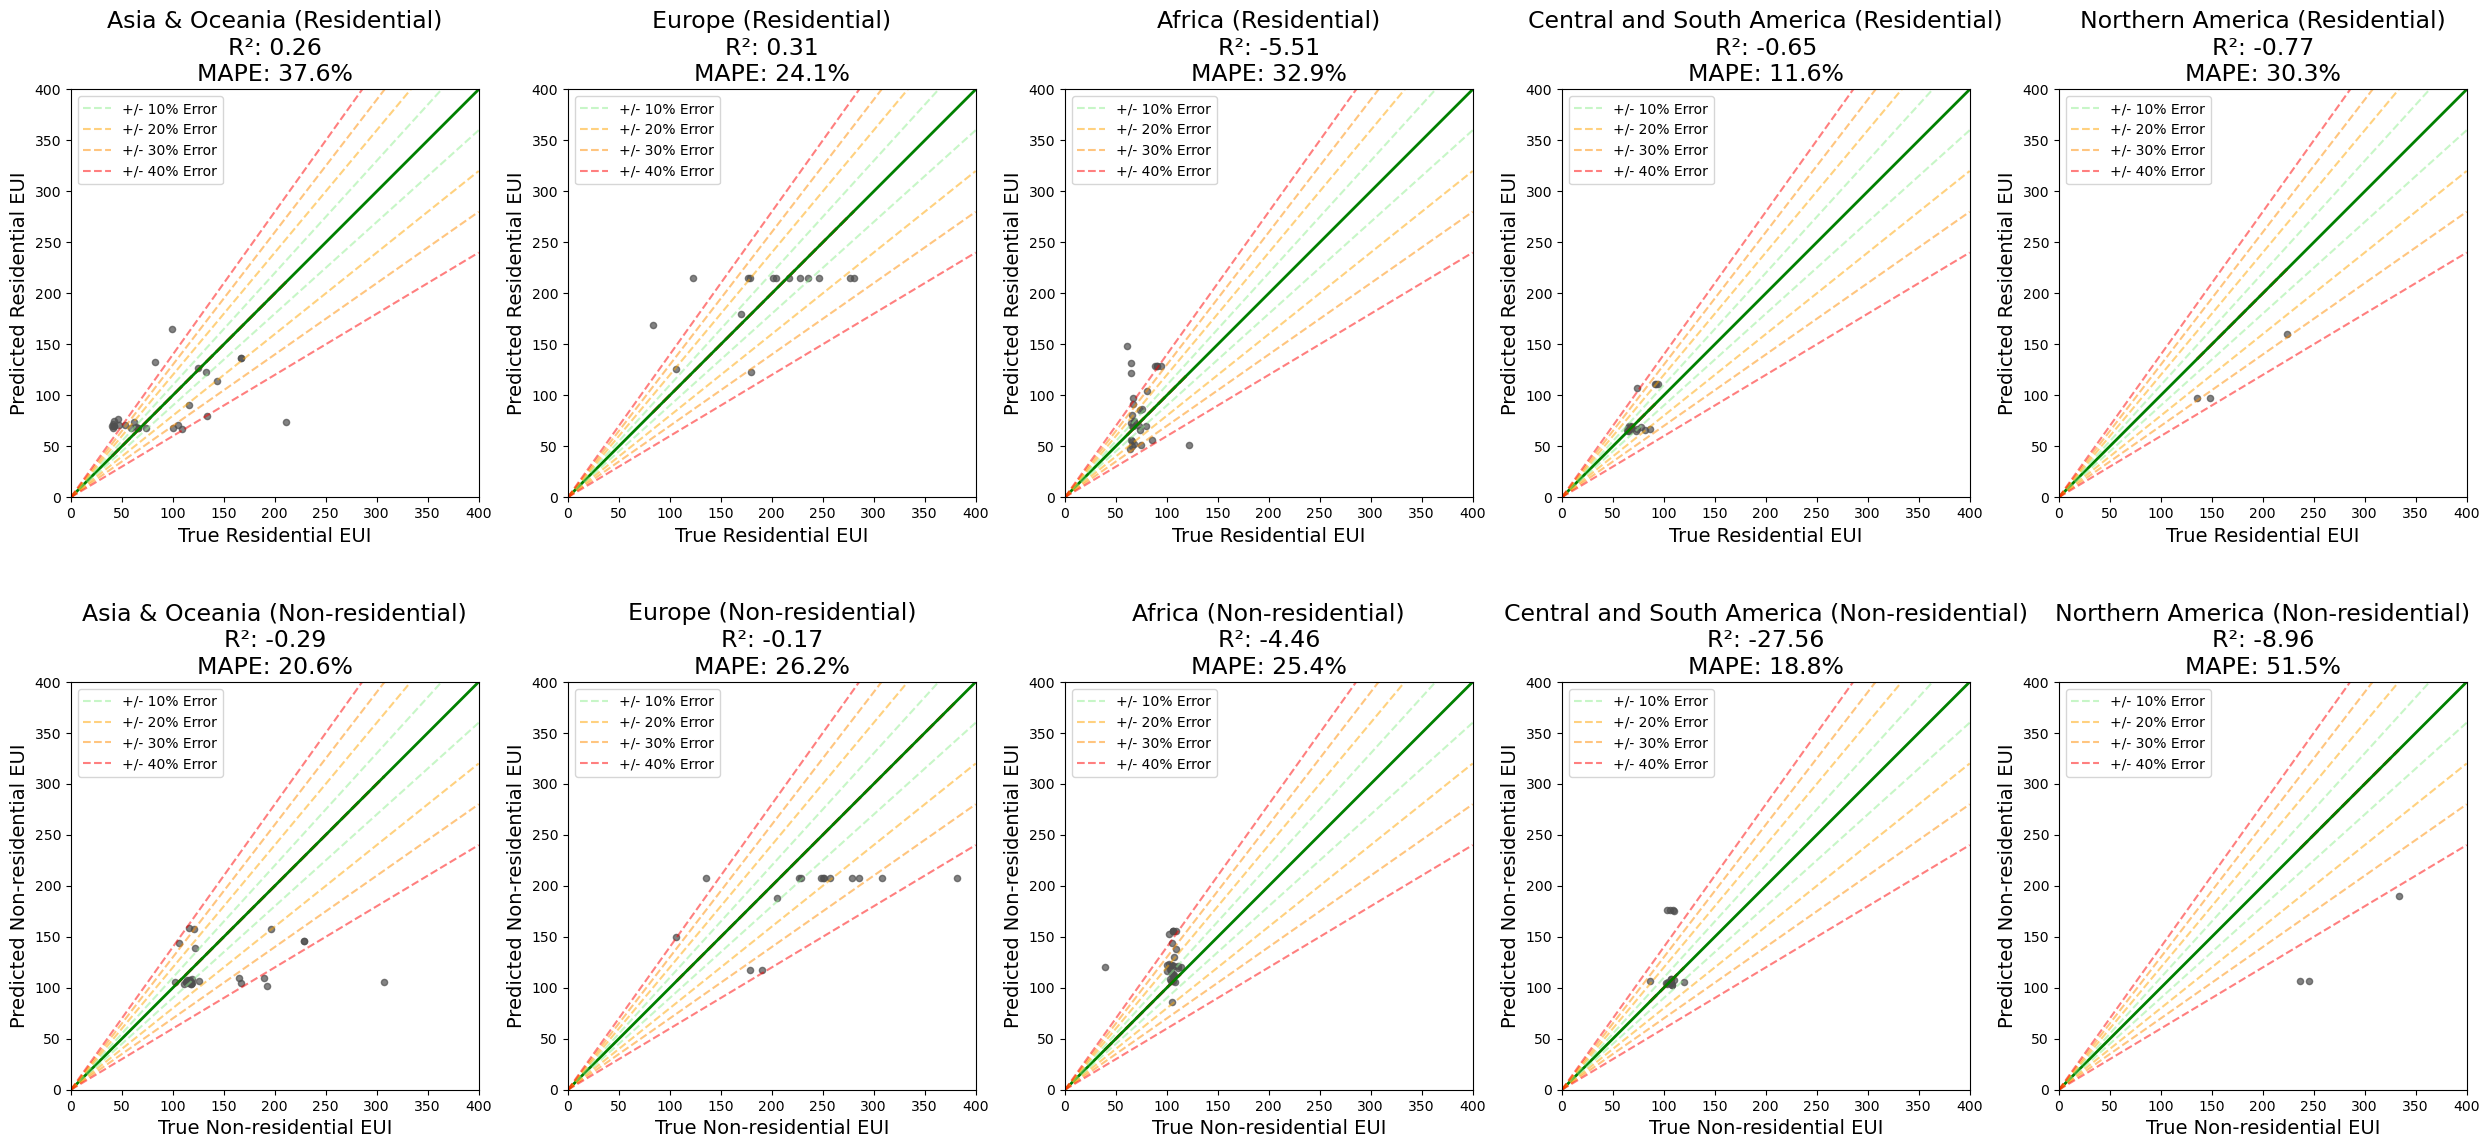

In [10]:
# Cross-domain 
model_knn_cross = KNeighborsRegressor(n_neighbors=5)
results_cross = train_and_evaluate_models(
   merged_df=merged_df,
   regions=regions,
   features=features, 
   model=model_knn_cross,
   strategy='cross_domain'
)
create_eui_comparison_plots(results_cross,
   save_path='../figures/eui_predictions_knn_cross_domain.png')

# KNN - All Domain

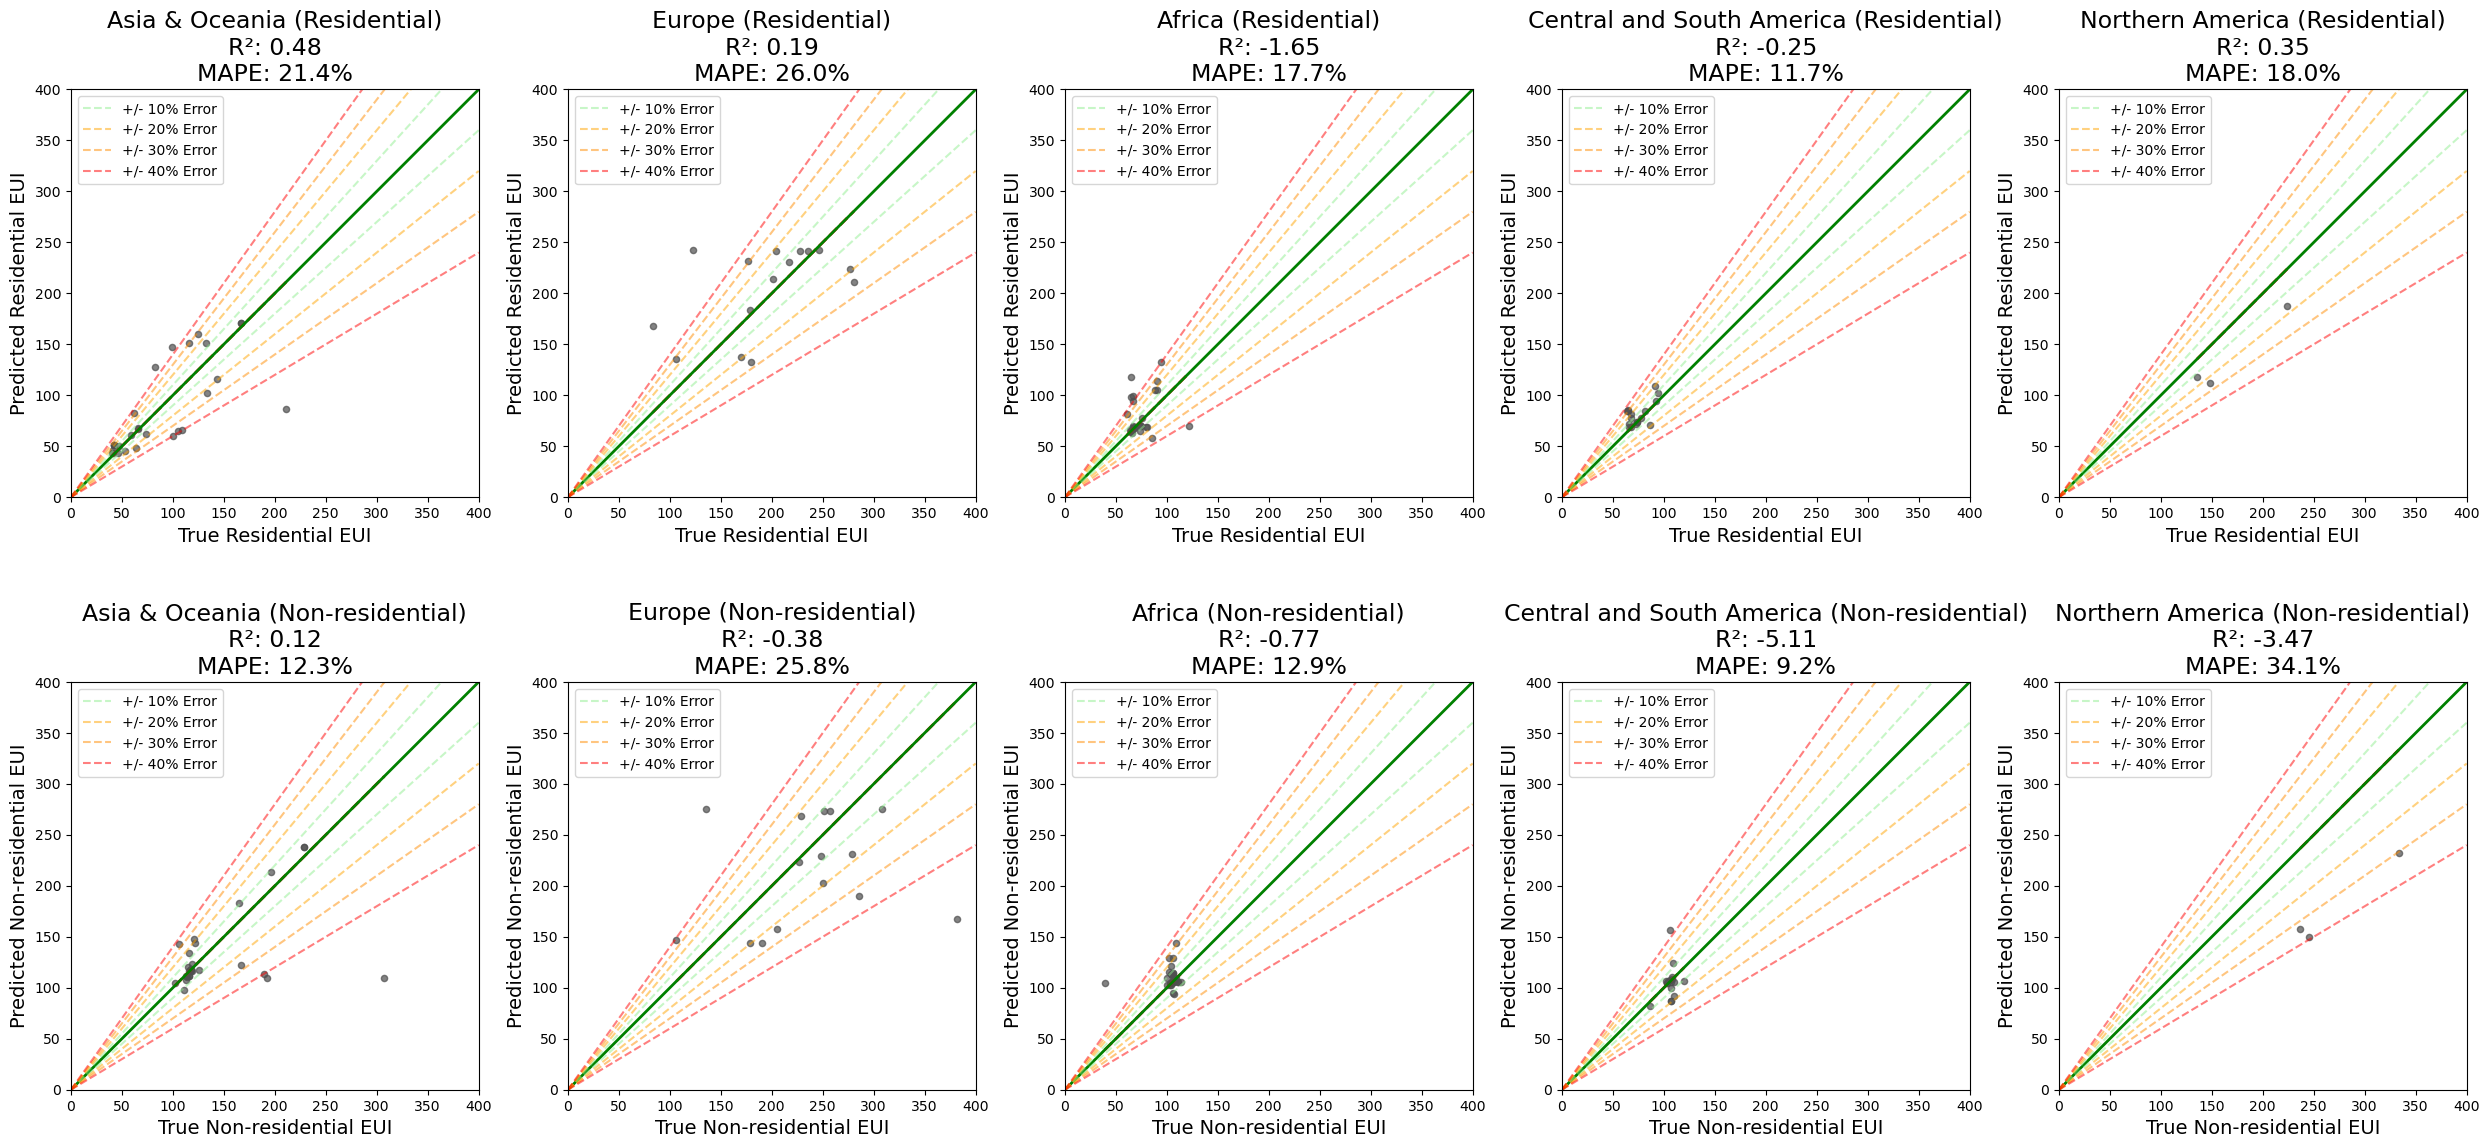

In [11]:
# All-domain
model_knn_all = KNeighborsRegressor(n_neighbors=5)
results_all = train_and_evaluate_models(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model=model_knn_all, 
   strategy='all_domain'
)
create_eui_comparison_plots(results_all,
   save_path='../figures/eui_predictions_knn_all_domain.png')